In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import cosima_cookbook as cc
import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate
from scipy import stats

import cartopy.crs as ccrs
import cartopy.feature as cft
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)
import matplotlib.gridspec as gridspec

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

netcdf_index loaded.
Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
# input_path_obs = '/g/data/e14/erd561/NOAA_OI_SST_V2/'

input_path_mod = '/g/data/e14/erd561/access-om2/'

In [4]:
sst_1_mod = xr.open_dataset(input_path_mod + 'sst_1.nc').sst_1-273.15
print(sst_1_mod)
sst_1_slopes_mod = xr.open_dataset(input_path_mod + 'sst_1_slopes.nc').sst_1_slopes
print(sst_1_slopes_mod)

sst_025_mod = xr.open_dataset(input_path_mod + 'sst_025.nc').sst_025-273.15
print(sst_025_mod)
sst_025_slopes_mod = xr.open_dataset(input_path_mod + 'sst_025_slopes.nc').sst_025_slopes
print(sst_025_slopes_mod)

sst_1_mod_C4 = xr.open_dataset(input_path_mod + 'sst_1_C4.nc').sst_1-273.15
print(sst_1_mod_C4)
sst_1_slopes_mod_C4 = \
xr.open_dataset(input_path_mod + 'sst_1_slopes_C4.nc').sst_1_slopes
print(sst_1_slopes_mod_C4)

sst_025_mod_C4 = xr.open_dataset(input_path_mod + 'sst_025_C4.nc').sst_025-273.15
print(sst_025_mod_C4)
sst_025_slopes_mod_C4 = \
xr.open_dataset(input_path_mod + 'sst_025_slopes_C4.nc').sst_025_slopes
print(sst_025_slopes_mod_C4)

sst_01_mod_C4 = xr.open_dataset(input_path_mod + 'sst_01_C4.nc').sst_01-273.15
print(sst_01_mod_C4)
sst_01_slopes_mod_C4 = xr.open_dataset(input_path_mod + 'sst_01_slopes_C4.nc').sst_01_slopes
print(sst_01_slopes_mod_C4)

<xarray.DataArray 'sst_1' (yt_ocean: 160, xt_ocean: 90, time: 25)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-1.53949 , -1.744232, ..., -1.69516 , -1.538727],
        [-1.53183 , -1.743958, ..., -1.715515, -1.525177]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-1.470428, -1.718964, ..., -1.691589, -1.539093],
        [-1.467316, -1.718597, ..., -1.714447, -1.530243]],

       ...,

       [[27.668518, 27.628906, ..., 28.150269, 28.14505 ],
        [27.584412, 27.573608, ..., 28.131927, 28.117157],
        ...,
        [26.014893, 26.634674, ..., 26.683441, 27.275757],
        [25.98236 , 26.60141 , ..., 26.637238, 27.18985 ]],

       [[27.499268, 27.45581 , ..., 28.060791, 28.022614],
        [27.421143, 27.400879, ..., 28.008911, 28.007355],
        ...,
        [25.886993, 26.408478, ..., 

<xarray.DataArray 'sst_01_slopes' (yt_ocean: 1186, xt_ocean: 900)>
[1067400 values with dtype=float64]
Coordinates:
  * yt_ocean  (yt_ocean) float64 -70.0 -69.96 -69.92 ... 19.75 19.84 19.94
  * xt_ocean  (xt_ocean) float64 -269.9 -269.8 -269.7 ... -180.2 -180.1 -180.0


[[        nan         nan         nan ... -0.00338644 -0.00341989
  -0.00327435]
 [        nan         nan         nan ... -0.0051316  -0.00523597
  -0.00500669]
 [        nan         nan         nan ... -0.00670302 -0.00670391
  -0.00647325]
 ...
 [ 0.01196848  0.01328555  0.01489669 ...  0.017776    0.01697083
   0.01618143]
 [ 0.01263362  0.01432019  0.01554216 ...  0.01862978  0.01778283
   0.01694808]
 [ 0.01480058  0.01597217  0.01616202 ...  0.02015707  0.01938639
   0.01847717]]


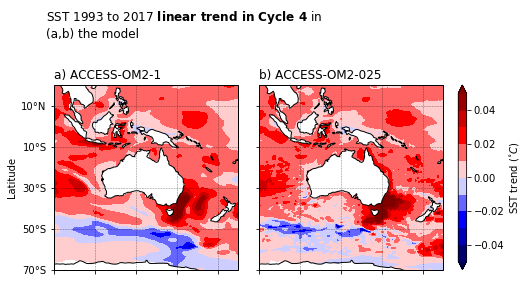

In [25]:
def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")

land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=1)

# fig = plt.figure(1, figsize=(7.48,9.06)) 
fig = plt.figure(1, figsize=(9.06,7.48)) 
matplotlib.rcParams.update({'font.size': 10})    

plt.suptitle(
    r'SST 1993 to 2017 $\bf{linear\ trend\ in\ Cycle\ 4}$ in ' +
    '\n(a,b) the model',
    x=0.2,y=1.025, ha='left')

row=2
col=2

ax = plt.subplot(row, col, 1, projection=ccrs.PlateCarree())
levels=arange(-0.05,0.05,0.01)
cmap = plt.cm.seismic
sst_1_bias = sst_1_slopes_mod_C4.values
print(sst_1_bias)
plt.contourf(sst_1_mod.xt_ocean+360, sst_1_mod.yt_ocean, 
             sst_1_bias, 
             levels=levels, extend='both', 
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical')
ax.set_title('a) ACCESS-OM2-1', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 2, projection=ccrs.PlateCarree())
# levels=arange(0,30,2.5)
# cmap = plt.cm.rainbow
sst_025_bias = sst_025_slopes_mod_C4.values
plt.contourf(sst_025_mod.xt_ocean+360, sst_025_mod.yt_ocean, 
             sst_025_bias, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
plt.colorbar(orientation='vertical', label='SST trend ($^{\circ}C$)')
ax.set_title('b) ACCESS-OM2-025', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
# ax.set_ylabel('Latitude')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


# ax = plt.subplot(row, col, 3, projection=ccrs.PlateCarree())
# # levels=arange(0,30,2.5)
# # cmap = plt.cm.rainbow
# sst_01_bias = sst_01_slopes_mod.values
# plt.contourf(sst_01_mod.xt_ocean+360, sst_01_mod.yt_ocean, 
#              sst_01_bias, 
#              levels=levels, extend='both',
#              cmap=cmap, transform=ccrs.PlateCarree())
# # plt.colorbar(orientation='vertical')
# ax.set_title('c) ACCESS-OM2-01 bias', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
# # ax.set_xticklabels('')
# ax.set_ylabel('Latitude')
# # ax.set_yticklabels('')
# ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
# ax.add_feature(land_50m)


# ax = plt.subplot(row, col, 4, projection=ccrs.PlateCarree())
# levels=arange(-0.05,0.05,0.01)
# cmap = plt.cm.seismic
# plt.contourf(sst_obs.lon+360, sst_obs.lat, 
#              sst_slopes_obs, 
#              levels=levels, extend='both',
#              cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical', label='Absolute SST ($^{\circ}C$)')
# ax.set_title('d) NOAA SST OI V2', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
# # ax.set_xticklabels('')
# # ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
# ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
# ax.add_feature(land_50m)

wspace = -0.3
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=None)

savefigure('linear_trend_cycle4')

[[            nan             nan             nan ... -1.70851487e-04
  -1.68480506e-04 -1.73621544e-04]
 [            nan             nan             nan ... -1.18948130e-04
  -1.27563477e-04 -1.42939641e-04]
 [            nan             nan             nan ... -1.55146672e-04
  -1.54794546e-04 -1.58268855e-04]
 ...
 [ 2.05829327e-04  9.72102239e-05 -1.37563852e-05 ... -1.36272724e-04
  -1.04722243e-04 -1.56531701e-04]
 [ 2.42168720e-04 -2.49070388e-05  1.08689528e-05 ...  1.07281025e-05
   8.40641902e-05  1.15732046e-05]
 [ 4.81003981e-05  4.75369967e-05  7.74676983e-07 ...  2.54117526e-04
   3.39871920e-04  3.61093374e-04]]


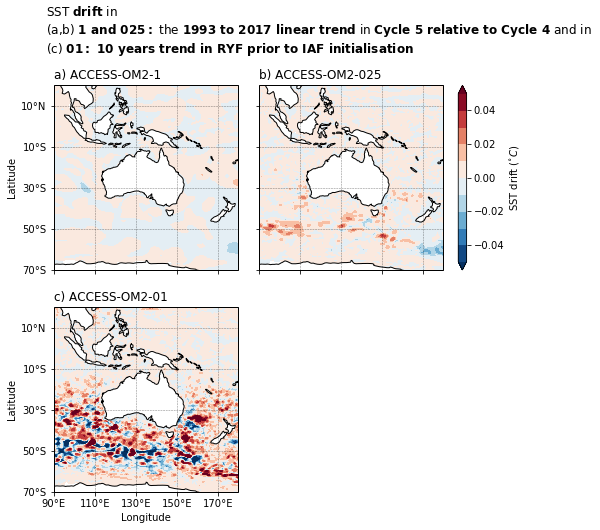

In [34]:
# fig = plt.figure(1, figsize=(7.48,9.06)) 
fig = plt.figure(1, figsize=(9.06,7.48)) 
matplotlib.rcParams.update({'font.size': 10})    

plt.suptitle(
    r'SST $\bf{drift}$ in' + '\n(a,b)' + r' $\bf{1\ and\ 025:}$ ' + 
    r'the $\bf{1993\ to\ 2017\ linear\ trend}$ in ' +
    r'$\bf{Cycle\ 5\ relative\ to\ Cycle\ 4}$ ' +
    'and in ' + 
    '\n(c)' + r' $\bf{01:\ 10\ years\ trend\ in\ RYF\ prior\ to\ IAF\ initialisation}$',
    x=0.2,y=1.025, ha='left')

row=2
col=2

ax = plt.subplot(row, col, 1, projection=ccrs.PlateCarree())
levels=arange(-0.05,0.05,0.01)
cmap = plt.cm.RdBu_r
sst_1_bias = sst_1_slopes_mod.values-sst_1_slopes_mod_C4.values
print(sst_1_bias)
plt.contourf(sst_1_mod.xt_ocean+360, sst_1_mod.yt_ocean, 
             sst_1_bias, 
             levels=levels, extend='both', 
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical')
ax.set_title('a) ACCESS-OM2-1', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 2, projection=ccrs.PlateCarree())
# levels=arange(0,30,2.5)
# cmap = plt.cm.rainbow
sst_025_bias = sst_025_slopes_mod.values-sst_025_slopes_mod_C4.values
plt.contourf(sst_025_mod.xt_ocean+360, sst_025_mod.yt_ocean, 
             sst_025_bias, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
plt.colorbar(orientation='vertical', label='SST drift ($^{\circ}C$)')
ax.set_title('b) ACCESS-OM2-025', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
# ax.set_ylabel('Latitude')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 3, projection=ccrs.PlateCarree())
# levels=arange(0,30,2.5)
# cmap = plt.cm.rainbow
sst_01_bias = sst_01_slopes_mod.values
plt.contourf(sst_01_mod.xt_ocean+360, sst_01_mod.yt_ocean, 
             sst_01_bias, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical')
ax.set_title('c) ACCESS-OM2-01', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


# ax = plt.subplot(row, col, 4, projection=ccrs.PlateCarree())
# levels=arange(-0.05,0.05,0.01)
# cmap = plt.cm.seismic
# plt.contourf(sst_obs.lon+360, sst_obs.lat, 
#              sst_slopes_obs, 
#              levels=levels, extend='both',
#              cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical', label='Absolute SST ($^{\circ}C$)')
# ax.set_title('d) NOAA SST OI V2', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
# # ax.set_xticklabels('')
# # ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
# ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
# ax.add_feature(land_50m)

wspace = -0.3
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=None)

savefigure('drift')

In [5]:
sst_01_slopes_mod

NameError: name 'sst_01_slopes_mod' is not defined